<center>МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ </center>
<center>ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ </center>
<center>«НОВОСИБИРСКИЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ»</center>
<center>Кафедра Систем сбора и обработки данных </center>
<br>
<center> <b> <font size="5">  ОТЧЁТ </font>  </b>  </center>   
<center><font size="3">по лабораторной работе №3</font></center>
<center><font size="3">по дисциплине: «Машинное обучение» </font></center>
<br>

Выполнил:
- _ _ _ Дмитриченко Д.А. _ _ _


<center>  Новосибирск, 2025  </center>

In [2]:
# --- Общие импорты ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# --- Импорты для классификации ---
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.ensemble import (
    BaggingClassifier, 
    ExtraTreesClassifier, 
    AdaBoostClassifier, 
    GradientBoostingClassifier, 
    VotingClassifier, 
    RandomForestClassifier, 
    StackingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    roc_curve, 
    auc,
    roc_curve, 
    roc_auc_score)
from sklearn.tree import DecisionTreeClassifier

# --- Импорты для регрессии ---
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics

from itertools import cycle

# Объявление функций

In [4]:
# ============================
#   Функция для оценки моделей
# Возвращает accuracy, confusion matrix, classification report
# ============================
def evaluate(model, X_train, X_test, y_train, y_test):
    # Предсказания на обучении
    y_test_pred = model.predict(X_test)
    # Предсказания на тесте
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
#--------------------------------------------------------------------------

### **Предварительная обработка данных**

*Примечание: Алгоритмы на основе деревьев решений, как Случайный лес, не требуют нормализации/масштабирования признаков, так как они не чувствительны к масштабу. Но это является хорошей практикой для многих других алгоритмов.*


Загрузка данных

In [5]:
df = pd.read_excel("F:/VLM_Usability/Dataset/data/all_domains_valid2.xlsx")

In [6]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,filename,domain,Complexity,Aesthetics,Orderliness,VA_PNG,VA_JPEG,elements,elem. types,visual complex,...,Static clusters,DynamicCC (clusters),DynamicCC (avg cluster colors),QuadtreeDec (balance),QuadtreeDec (symmetry),QuadtreeDec (equilibrium),QuadtreeDec (leaves),whitespace,grid quality,count
0,www-vanartgallery-bc-ca-.png,culture,4.3333,3.8333,3.8333,1222645,1104785.0,11.0,4.0,441.66,...,3020.0,553.0,13.0,0.311124,0.479847,0.999714,2038.0,0.464334,80.0,6
1,www-fine-arts-museum-be-en.png,culture,5.2500,5.2500,6.0000,828090,689774.0,28.0,5.0,1261.00,...,2832.0,696.0,14.0,0.552323,0.590591,0.999712,2023.0,0.461892,100.0,4
2,whitney-org-.png,culture,2.8000,4.2000,4.8000,851551,675691.0,8.0,4.0,309.86,...,1468.0,928.0,13.0,0.537918,0.468239,0.999710,2014.0,0.221444,111.0,5
3,www-newarkmuseumart-org-.png,culture,5.0000,3.2500,3.2500,827116,908296.0,27.0,5.0,1240.85,...,3315.0,512.0,14.0,0.905866,0.561886,0.999791,2797.0,0.354108,102.0,4
4,ogunquitmuseum-org-.png,culture,3.5000,4.7500,4.5000,1342457,943746.0,2.0,3.0,62.92,...,626.0,806.0,15.0,0.920653,0.612523,0.999841,3676.0,-0.017633,43.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,http...tpsc.go.tz.png,univer,3.4444,2.0000,3.5556,1158547,1084732.0,50.0,4.0,2004.89,...,3933.0,463.0,13.0,0.156241,0.447053,0.999863,3406.0,0.638692,214.0,9
3080,http...trainnorth.ca..png,univer,2.5556,5.1111,5.0000,1433868,1736577.0,65.0,5.0,3128.35,...,4736.0,1456.0,13.0,0.809817,0.516359,0.999950,7576.0,0.183051,162.0,9
3081,http...www.ada.edu.az.png,univer,3.2500,4.0000,4.2500,1226146,1144705.0,32.0,4.0,1288.10,...,4170.0,765.0,13.0,0.796083,0.567660,0.999772,2692.0,0.388271,75.0,8
3082,http...www.adventist.org..png,univer,3.2000,5.3000,5.4000,1357957,1676545.0,64.0,6.0,3420.76,...,4466.0,1098.0,13.0,0.736705,0.586652,0.999943,6766.0,0.366483,183.0,10


In [7]:
df.describe()

,Complexity,Aesthetics,Orderliness,VA_PNG,VA_JPEG,elements,elem. types,visual complex,edge congestion,unique RGB,...,Static clusters,DynamicCC (clusters),DynamicCC (avg cluster colors),QuadtreeDec (balance),QuadtreeDec (symmetry),QuadtreeDec (equilibrium),QuadtreeDec (leaves),whitespace,grid quality,count
count,3084.000000,3084.000000,3084.000000,3.084000e+03,3.084000e+03,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,...,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000
mean,3.711385,4.166481,4.342670,8.852198e+05,8.896231e+05,27.944553,4.430285,1247.584339,0.252365,13741.601816,...,3859.278210,692.980545,12.359922,0.711089,0.563676,0.999561,2875.877432,0.340411,91.726329,4.907263
std,0.825807,0.976440,0.862815,5.291624e+05,4.745478e+05,22.066566,1.279344,1220.138792,0.082196,10061.431926,...,2030.498324,448.726497,1.350687,0.245767,0.050862,0.002141,2001.856285,0.264851,61.385107,1.663315
min,1.000000,1.000000,1.000000,4.502500e+04,9.937100e+04,1.000000,2.000000,18.860000,0.001155,205.000000,...,88.000000,4.000000,7.000000,-0.340545,0.366394,0.962153,16.000000,-0.879323,4.000000,3.000000
25%,3.200000,3.500000,3.750000,5.256238e+05,6.105398e+05,15.000000,4.000000,533.977500,0.194335,6233.500000,...,2329.250000,360.000000,12.000000,0.615139,0.525515,0.999660,1761.250000,0.162585,49.000000,4.000000
50%,3.750000,4.250000,4.375000,7.763750e+05,7.654555e+05,22.000000,4.000000,908.230000,0.252909,11413.000000,...,3641.500000,598.000000,12.000000,0.800160,0.567327,0.999755,2438.500000,0.366322,80.000000,4.000000
75%,4.250000,4.800000,5.000000,1.124643e+06,1.007100e+06,34.000000,5.000000,1498.012500,0.305559,19006.250000,...,5091.250000,938.250000,13.000000,0.880662,0.603306,0.999810,3151.750000,0.535860,120.250000,5.000000
max,6.500000,7.000000,6.800000,3.569335e+06,3.472174e+06,337.000000,9.000000,15066.930000,0.877401,59919.000000,...,15050.000000,2704.000000,19.000000,0.966641,0.660925,0.999973,13951.000000,0.971660,470.000000,24.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   filename                          3084 non-null   object 
 1   domain                            3084 non-null   object 
 2   Complexity                        3084 non-null   float64
 3   Aesthetics                        3084 non-null   float64
 4   Orderliness                       3084 non-null   float64
 5   VA_PNG                            3084 non-null   int64  
 6   VA_JPEG                           3084 non-null   float64
 7   elements                          3084 non-null   float64
 8   elem. types                       3084 non-null   float64
 9   visual complex                    3084 non-null   float64
 10  edge congestion                   3084 non-null   float64
 11  unique RGB                        3084 non-null   float64
 12  HSVcol

In [9]:
df['domain'].value_counts()

domain
culture    746
health     541
univer     392
food       369
games      362
gov        346
news       328
Name: count, dtype: int64

In [10]:
df.isnull().sum()

filename                            0
domain                              0
Complexity                          0
Aesthetics                          0
Orderliness                         0
VA_PNG                              0
VA_JPEG                             0
elements                            0
elem. types                         0
visual complex                      0
edge congestion                     0
unique RGB                          0
HSVcolours (avg Hue)                0
HSVcolours (avg Saturation)         0
HSVcolours (std Saturation)         0
HSVcolours (avg Value)              0
HSVcolours (std Value)              0
HSVspectrum (HSV)                   0
HSVspectrum (Hue)                   0
HSVspectrum (Saturation)            0
HSVspectrum (Value)                 0
Hassler-Susstrunk (dist A)          0
Hassler-Susstrunk (std A)           0
Hassler-Susstrunk (dist B)          0
Hassler-Susstrunk (std B)           0
Hassler-Susstrunk (dist RGYB)       0
Hassler-Suss

In [11]:
X = df.drop(['domain', 'filename'], axis=1)

y = df['domain']

In [47]:
feature_names = X.columns

In [59]:
class_names = sorted(y.unique()) 
print("Названия классов:", class_names)

Названия классов: ['culture', 'food', 'games', 'gov', 'health', 'news', 'univer']


In [35]:
# описание для НЕ числовых значений, при их наличии
if (X.dtypes == 'object').sum() >0:
    print(X.describe(include=['object', 'bool']).T )

## Поиск и обработка выбросов

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12552\3101353673.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(16,2))


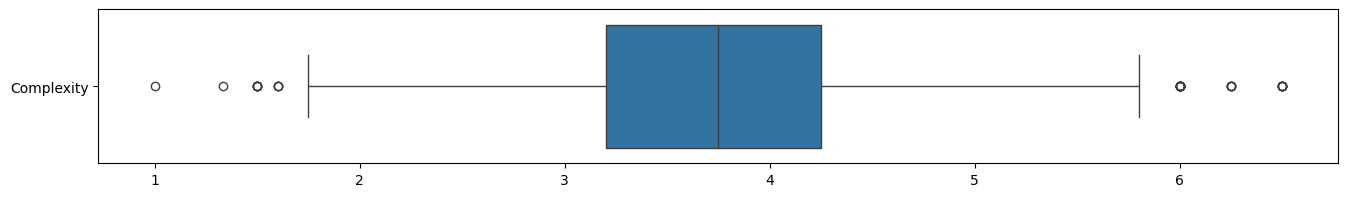

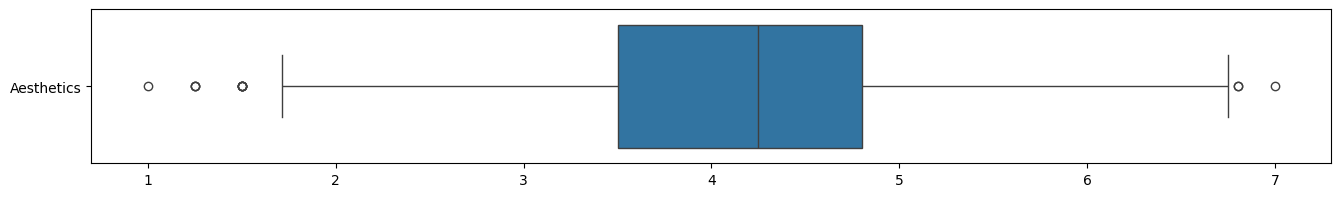

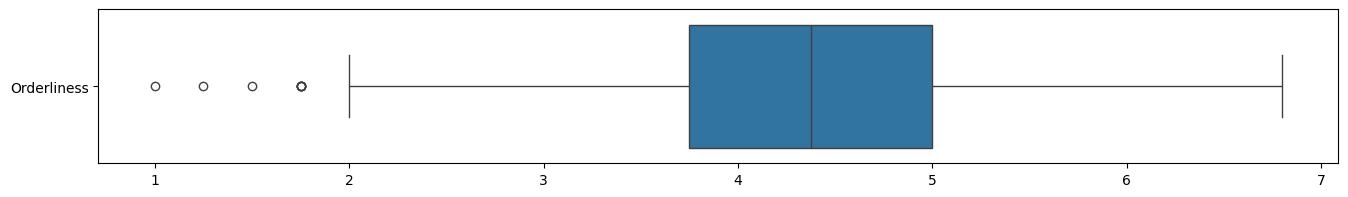

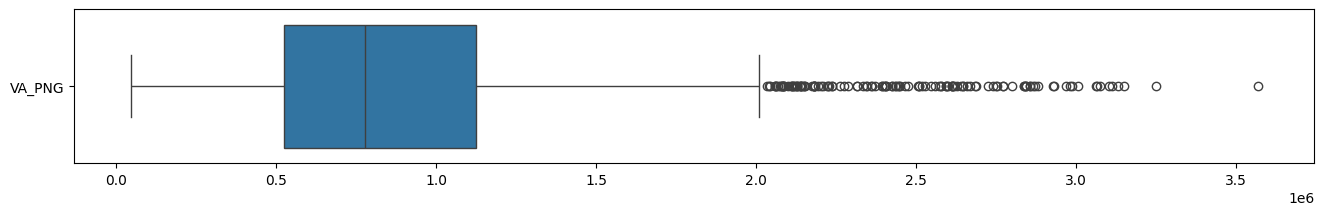

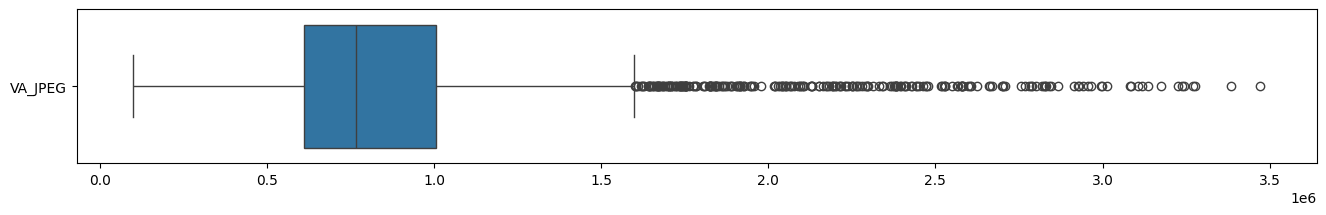

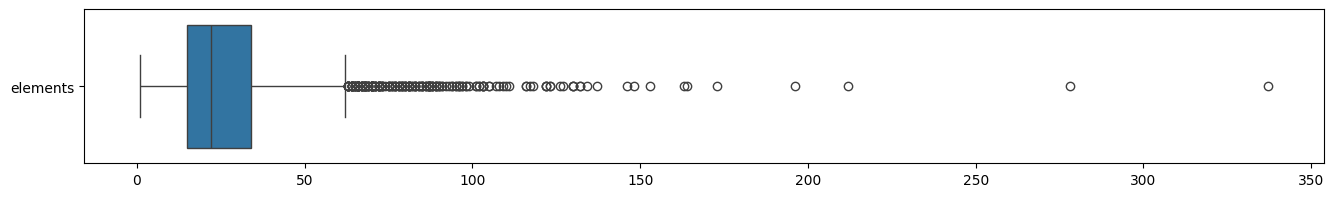

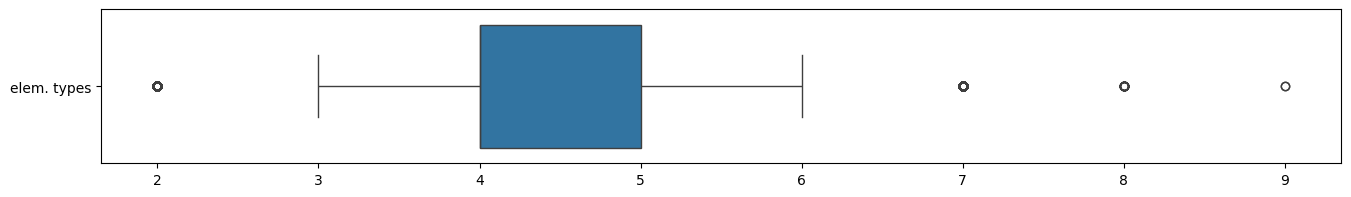

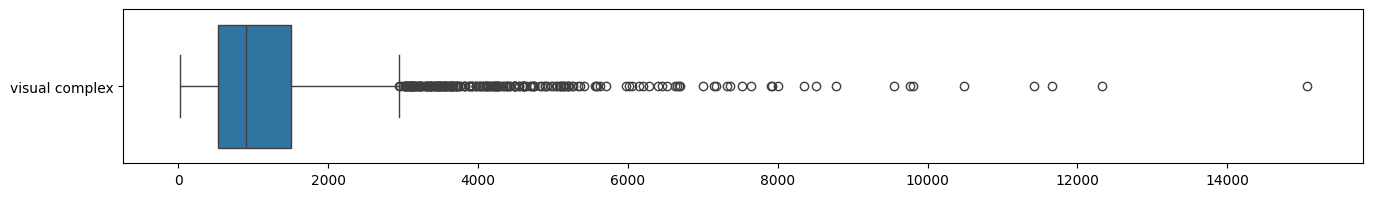

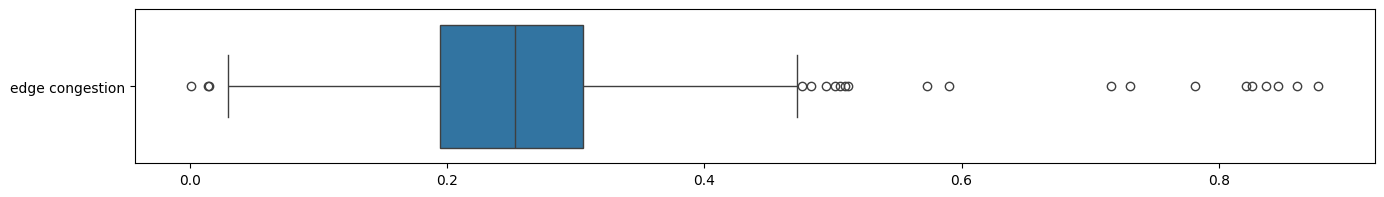

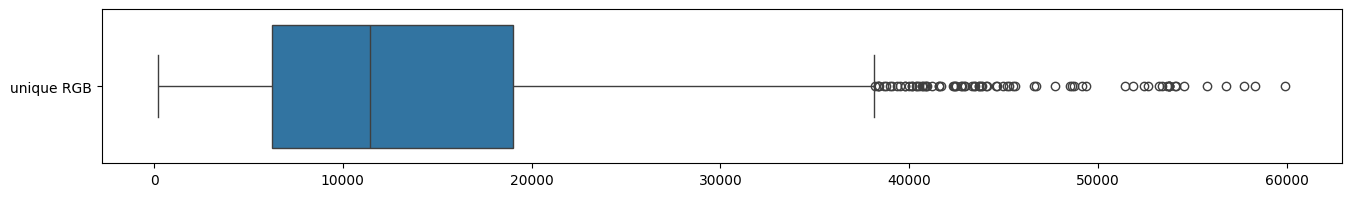

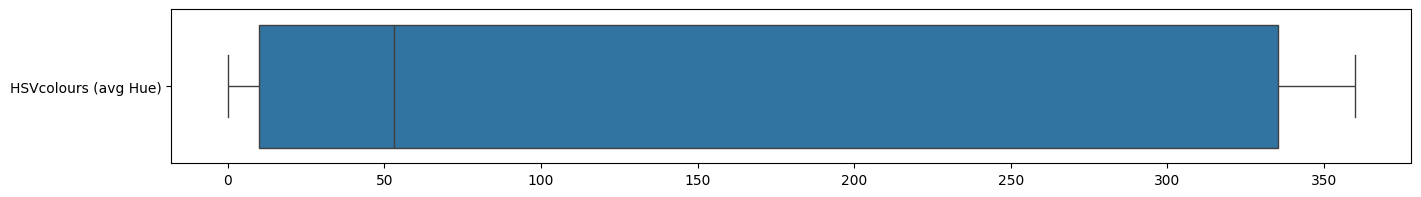

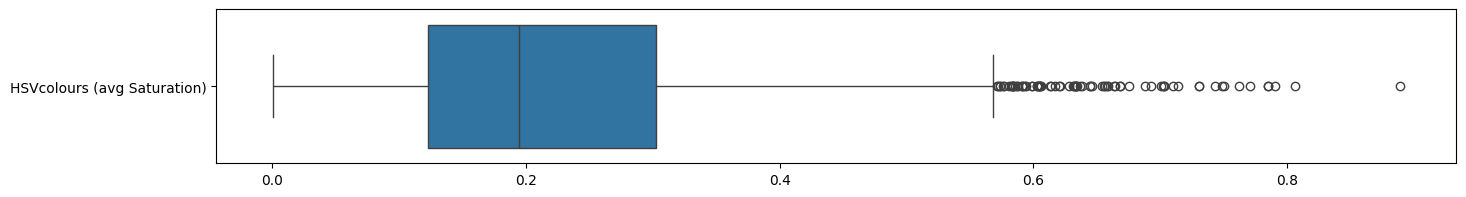

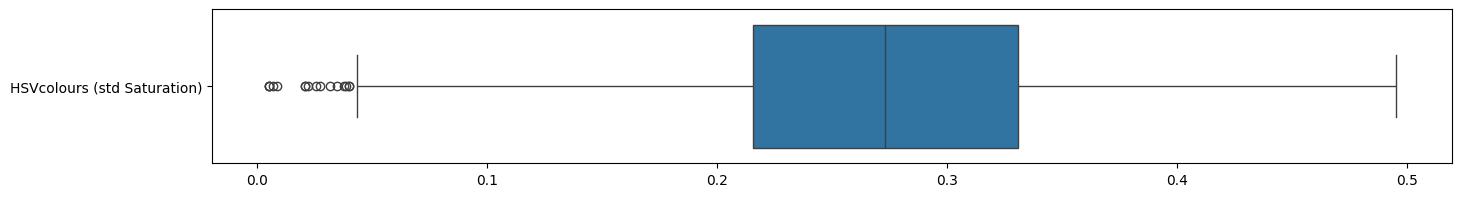

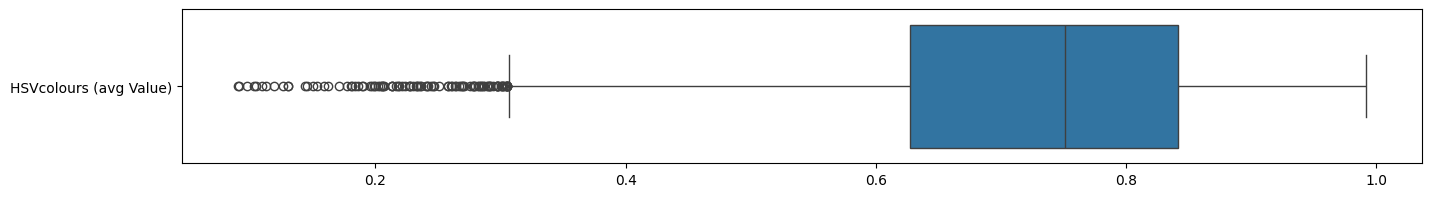

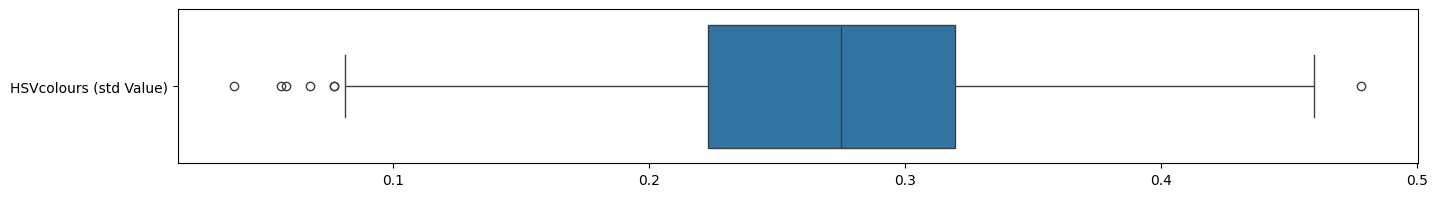

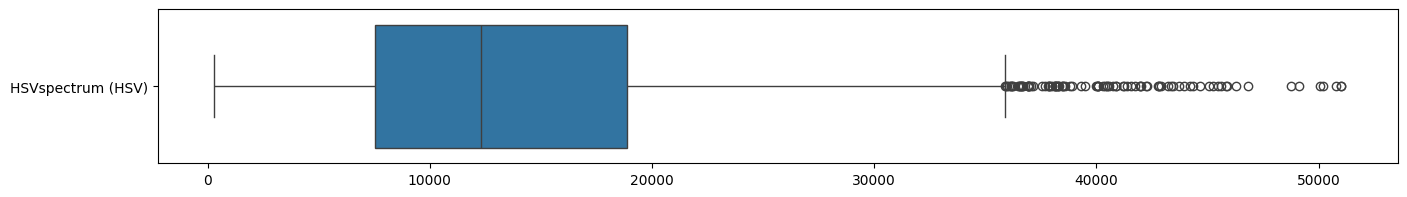

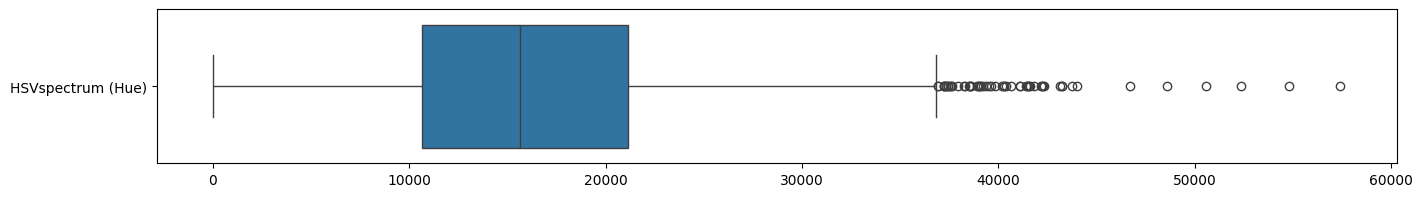

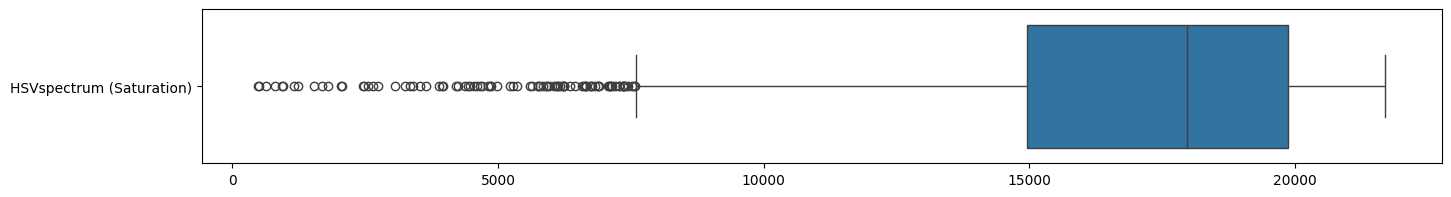

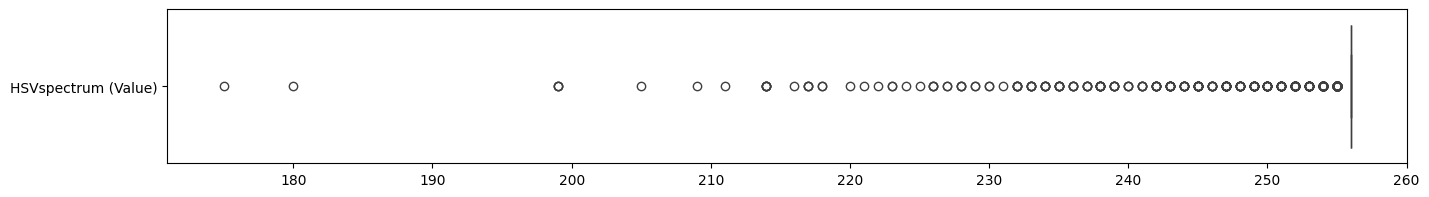

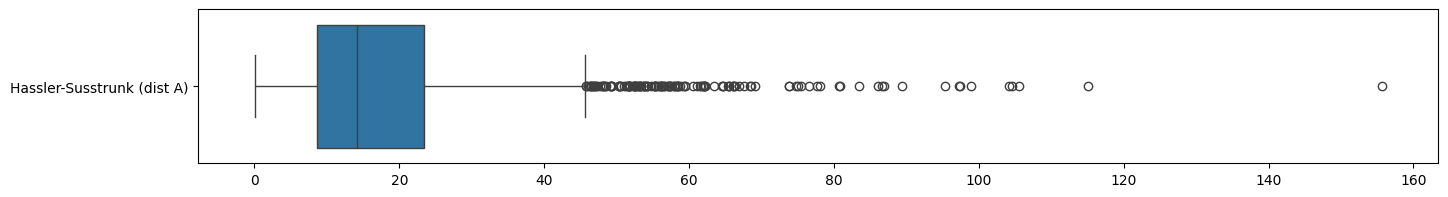

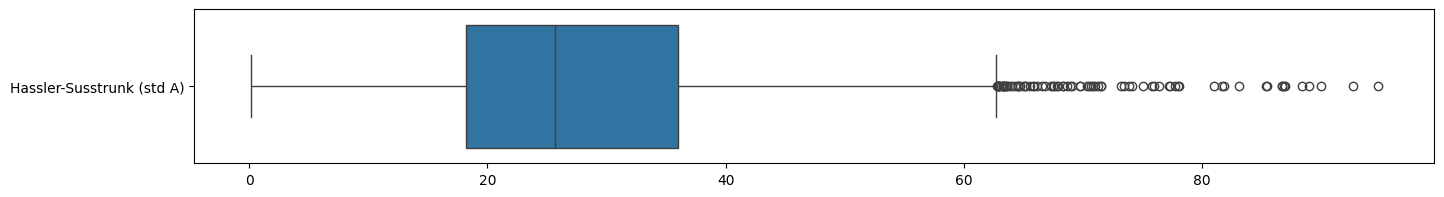

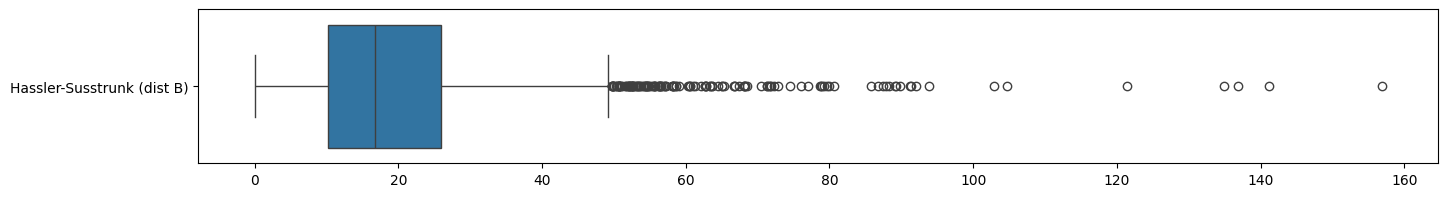

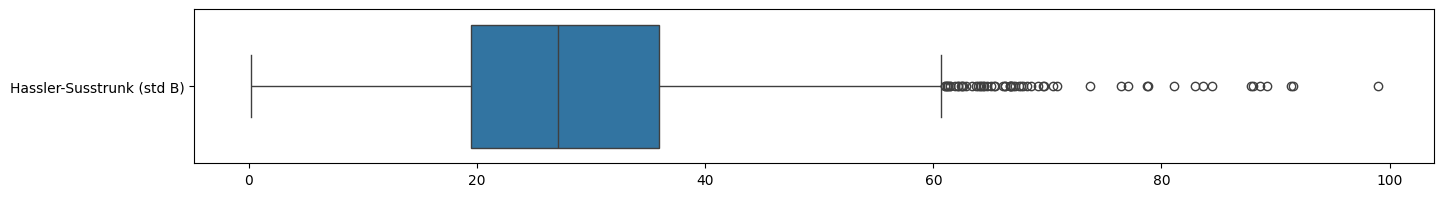

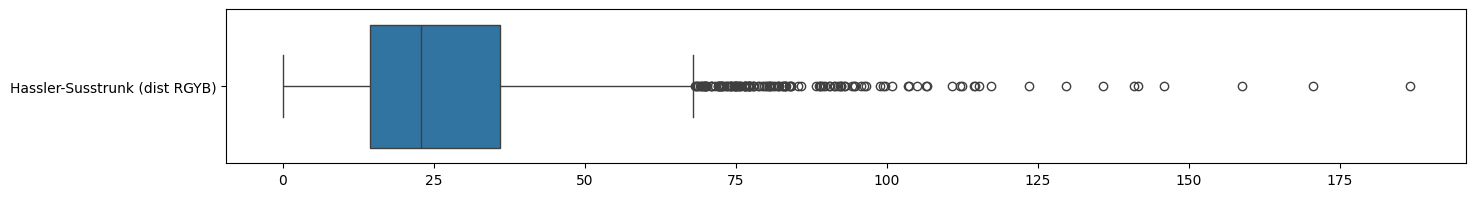

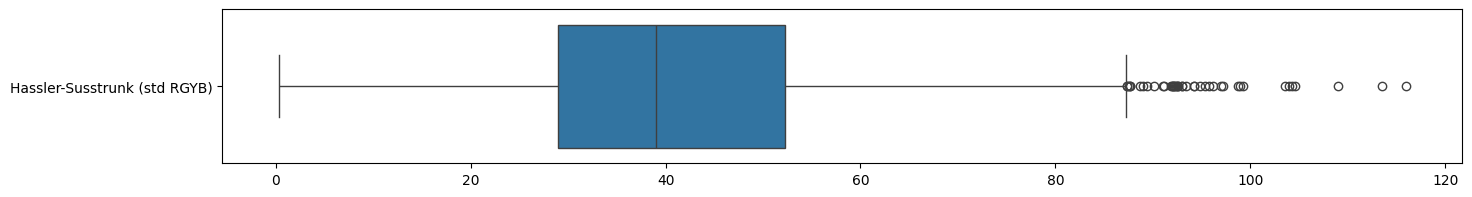

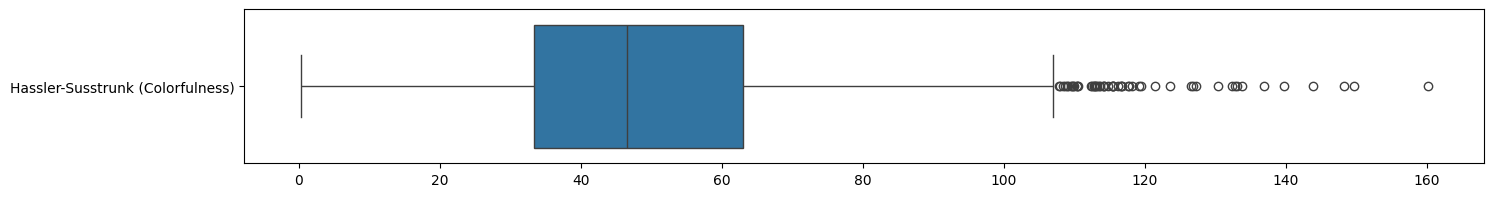

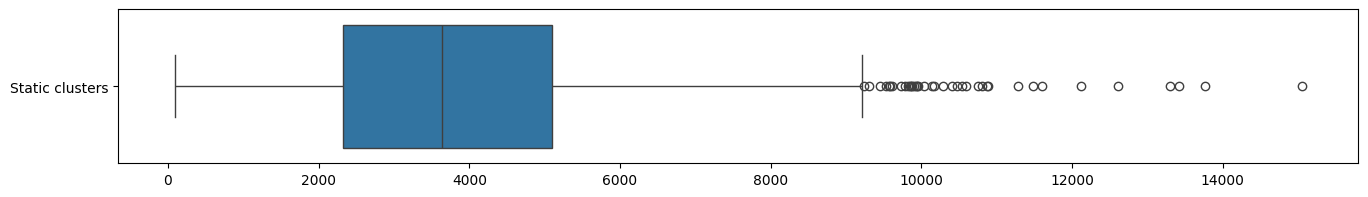

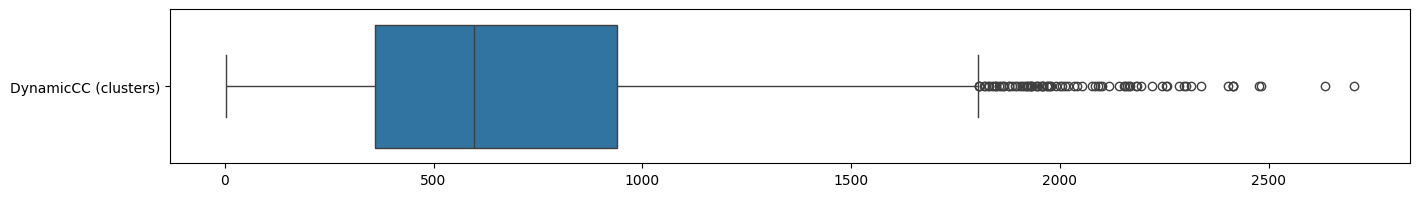

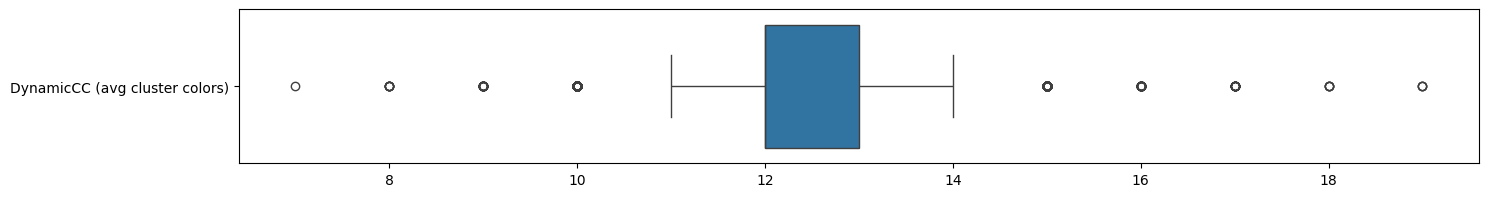

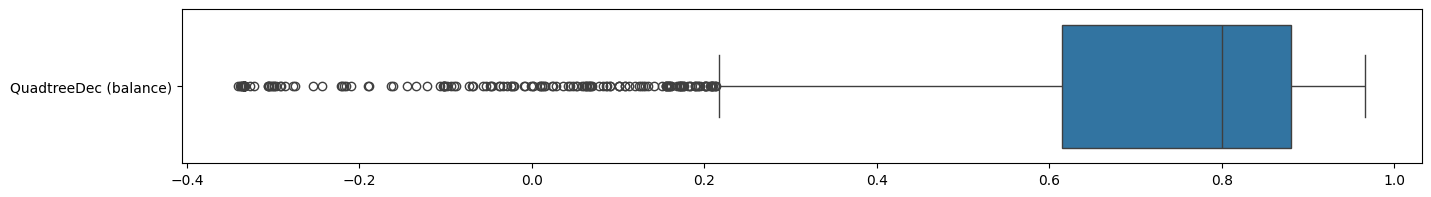

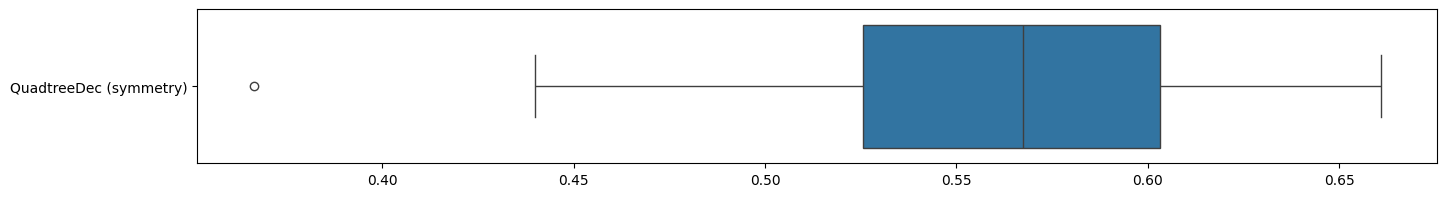

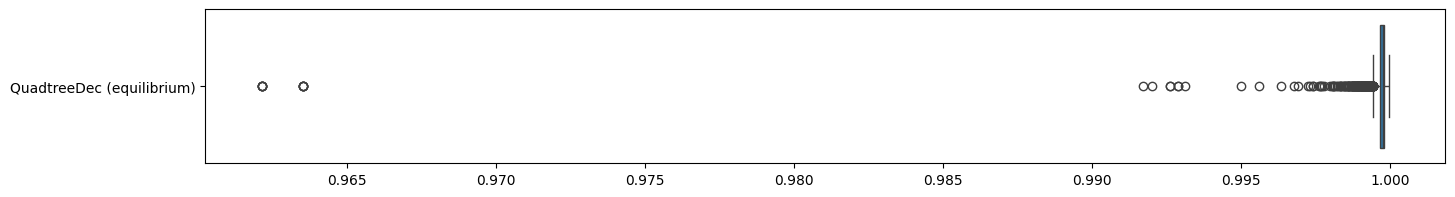

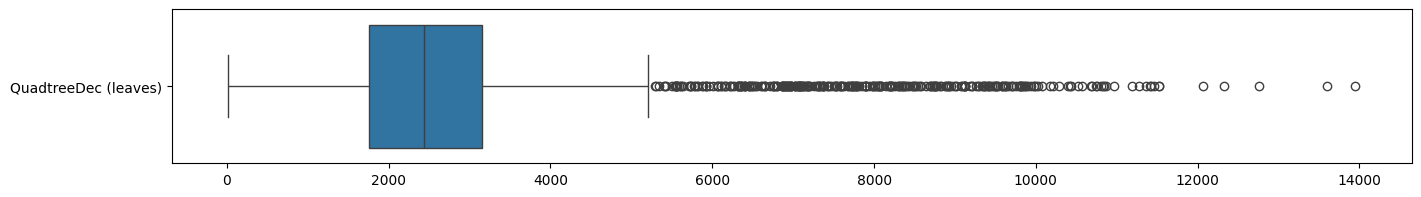

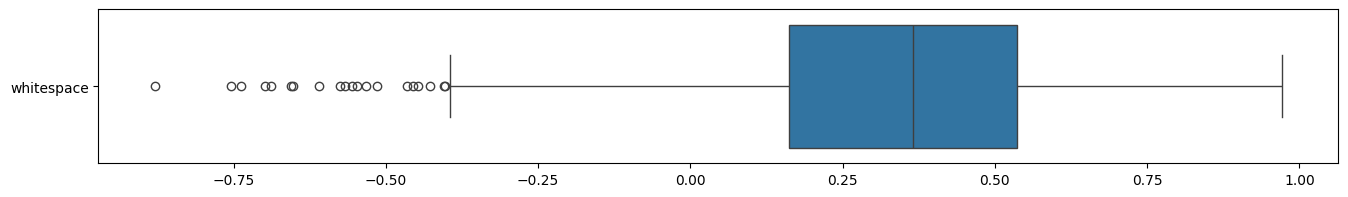

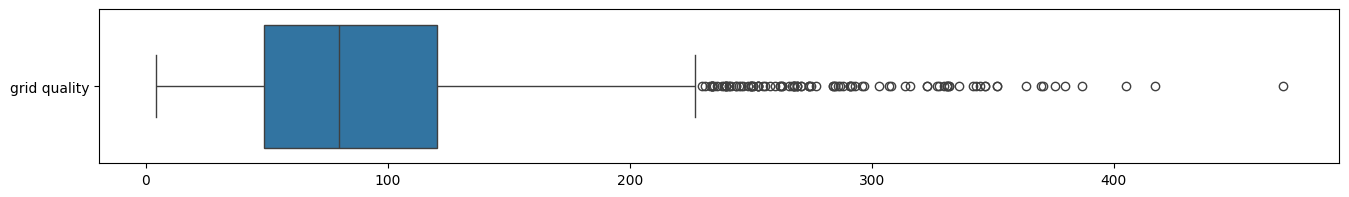

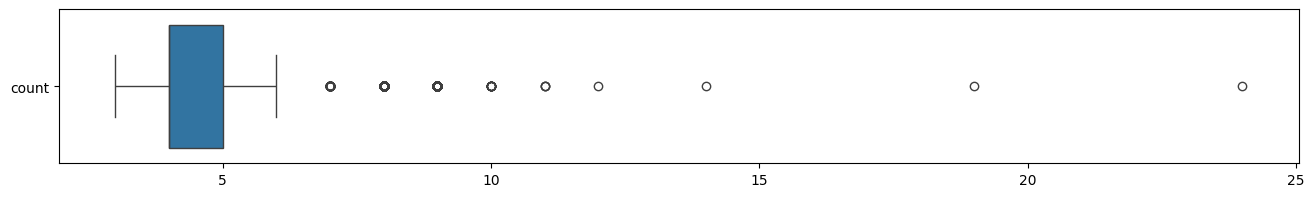

In [36]:
# Цикл: для каждого элемента в объединенном списке
for feature_name in (X.columns):

    # Построить полотно для рисования с указанным размером
    plt.figure(figsize=(16,2))

    # На созданном полотне отрисовать boxplot
    sns.boxplot( data=X[[feature_name]], # данные
                    orient='h' # ориентация графика
                    )

Установим границы значений, для тех объектов таблицы, которые должны остаться

Межквартильный размах (IQR) Это мера разброса данных, которая показывает диапазон центральных 50% значений. Он вычисляется по формуле:

IQR=Q3−Q1

Q1 — это первый квартиль (25-й процентиль), значение, ниже которого находится 25% всех данных.

Q3 — это третий квартиль (75-й процентиль), значение, ниже которого находится 75% всех данных.

Формулы для усов и выбросов Наиболее распространённый метод построения усов (метод Тьюки) основан на IQR. Он помогает выявить потенциальные выбросы, то есть значения, которые значительно отличаются от основной массы данных.

Формулы для границ:

Нижняя граница уса: Q1−1.5×IQR

Верхняя граница уса: Q3+1.5×IQR

Как это работает:

Нижний ус простирается от Q1 до самого маленького значения в наборе данных, которое больше или равно нижней границе. Если таких значений нет, то ус доходит до минимального значения в наборе.

Верхний ус простирается от Q3 до самого большого значения, которое меньше или равно верхней границе. Если таких значений нет, то ус доходит до максимального значения.

In [37]:
# создадим "словарь"/"хэш-таблицу" для удобного обращения, где ключ - это название признака
cols = X.columns


for col in cols:
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 3 * IQR #более мягкие границы: вместо 1.5 * IQR берём 3 * IQR.

        print(f"{col} = ({lower:.2f}, {upper:.2f})")

Complexity = (1.63, 7.40)
Aesthetics = (1.55, 8.70)
Orderliness = (1.88, 8.75)
VA_PNG = (-372905.12, 2921700.75)
VA_JPEG = (15699.00, 2196781.75)
elements = (-13.50, 91.00)
elem. types = (2.50, 8.00)
visual complex = (-912.08, 4390.12)
edge congestion = (0.03, 0.64)
unique RGB = (-12925.62, 57324.50)
HSVcolours (avg Hue) = (-478.33, 1311.47)
HSVcolours (avg Saturation) = (-0.15, 0.84)
HSVcolours (std Saturation) = (0.04, 0.68)
HSVcolours (avg Value) = (0.31, 1.48)
HSVcolours (std Value) = (0.08, 0.61)
HSVspectrum (HSV) = (-9453.75, 52888.75)
HSVspectrum (Hue) = (-5096.38, 52641.25)
HSVspectrum (Saturation) = (7575.12, 34639.25)
HSVspectrum (Value) = (256.00, 256.00)
Hassler-Susstrunk (dist A) = (-13.68, 68.01)
Hassler-Susstrunk (std A) = (-8.55, 89.46)
Hassler-Susstrunk (dist B) = (-13.26, 73.01)
Hassler-Susstrunk (std B) = (-5.39, 85.64)
Hassler-Susstrunk (dist RGYB) = (-17.76, 100.37)
Hassler-Susstrunk (std RGYB) = (-6.03, 122.24)
Hassler-Susstrunk (Colorfulness) = (-10.97, 151.78)
S

In [38]:
def remove_outliers_iqr(X, y=None, max_fraction_removed=0.1, iqr_coeff=3.0):
    """
    Удаляет выбросы по IQR, но не более max_fraction_removed от общего числа строк.

    Параметры:
        X : pd.DataFrame
            Входной датафрейм с числовыми признаками.
        max_fraction_removed : float
            Максимальная доля строк, которые можно удалить (например, 0.1 = 10%).
        soft_upper : float
            Коэффициент для верхней границы IQR (по умолчанию 3 вместо классических 1.5).

    Возвращает:
        pd.DataFrame — очищенный датафрейм
    """
    X_clean = X.copy()
    mask = pd.Series(True, index=X_clean.index)

    for col in X_clean.select_dtypes(include='number').columns:
        Q1 = X_clean[col].quantile(0.25)
        Q3 = X_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - iqr_coeff * IQR
        upper = Q3 + iqr_coeff * IQR

        # отмечаем выбросы
        mask &= X_clean[col].between(lower, upper, inclusive="both")

    # считаем долю выбросов
    fraction_removed = 1 - mask.mean()

    if fraction_removed > max_fraction_removed:
        print(f"Найдено {fraction_removed:.2%} выбросов — это больше лимита {max_fraction_removed:.0%}.")
        print("Ничего не удаляем.")
        if y is not None:
            return X_clean, y
        else:
            return X_clean
    else:
        print(f"Удаляем {fraction_removed:.2%} строк как выбросы.")
        X_clean = X_clean[mask]
        if y is not None:
            y_clean = y[mask]
            return X_clean, y_clean
        else:
            return X_clean

In [39]:
X_filtered, y_filtered = remove_outliers_iqr(X, y, max_fraction_removed=0.14, iqr_coeff=10.0)

Удаляем 13.04% строк как выбросы.


In [40]:
print("Размерность признаков (X):", X_filtered.shape)
print("Размерность целевой переменной (y):", y_filtered.shape)

Размерность признаков (X): (2682, 36)
Размерность целевой переменной (y): (2682,)


In [48]:
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_filtered, test_size = 0.2, random_state = 42)

In [50]:
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (2145, 36)
Размер тестовой выборки: (537, 36)


### Выбор значимых признаков и классификация с помощью метода случайного леса

Сначала обучим модель с заданными вами гиперпараметрами и критерием `gini`. Затем обучим вторую модель с критерием `entropy`, чтобы сравнить значимость признаков.

In [51]:
# --- Модель с критерием 'gini' ---
clf_gini = RandomForestClassifier(
    bootstrap=True, class_weight=None, criterion='gini',
    max_depth=None, max_features='sqrt', max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1, min_samples_split=2,
    min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=0, verbose=0,
    warm_start=False)

# Обучение модели
clf_gini.fit(X_train, y_train)

# Получение прогнозов
y_pred = clf_gini.predict(X_test)

In [73]:
# --- Модель с критерием 'entropy' ---
clf_entropy = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
clf_entropy.fit(X_train, y_train)

# Получение прогнозов
y_pred_entropy = clf_entropy.predict(X_test)

In [53]:
# --- Сравнение значимости признаков ---
feature_scores_gini = pd.Series(clf_gini.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores_entropy = pd.Series(clf_entropy.feature_importances_, index=X_train.columns).sort_values(ascending=False)

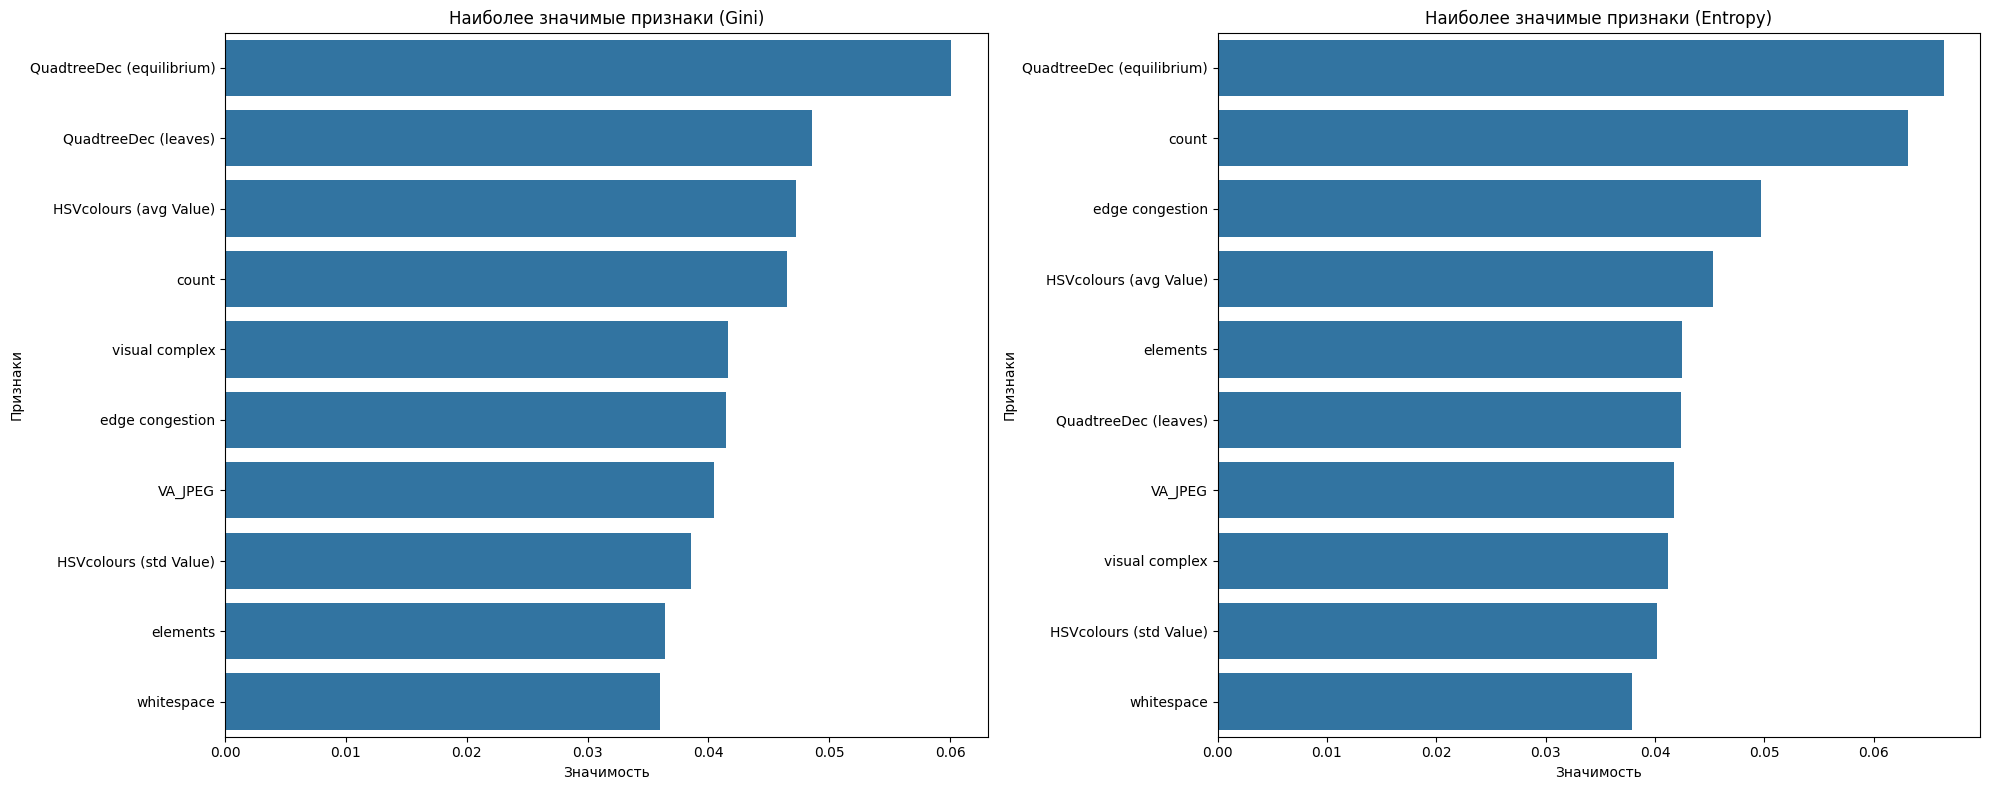

In [54]:
# Визуализация
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.barplot(x=feature_scores_gini.head(10), y=feature_scores_gini.head(10).index)
plt.title('Наиболее значимые признаки (Gini)')
plt.xlabel('Значимость')
plt.ylabel('Признаки')

plt.subplot(1, 2, 2)
sns.barplot(x=feature_scores_entropy.head(10), y=feature_scores_entropy.head(10).index)
plt.title('Наиболее значимые признаки (Entropy)')
plt.xlabel('Значимость')
plt.ylabel('Признаки')

plt.tight_layout()
plt.show()

In [55]:
print("Топ-5 признаков по критерию Gini:\n", feature_scores_gini.head())
print("\nТоп-5 признаков по критерию Entropy:\n", feature_scores_entropy.head())

Топ-5 признаков по критерию Gini:
 QuadtreeDec (equilibrium)    0.060084
QuadtreeDec (leaves)         0.048605
HSVcolours (avg Value)       0.047248
count                        0.046525
visual complex               0.041579
dtype: float64

Топ-5 признаков по критерию Entropy:
 QuadtreeDec (equilibrium)    0.066396
count                        0.063122
edge congestion              0.049679
HSVcolours (avg Value)       0.045260
elements                     0.042442
dtype: float64


### Матрица классификации (Confusion Matrix)

Построим матрицу ошибок для модели, обученной с критерием `gini`

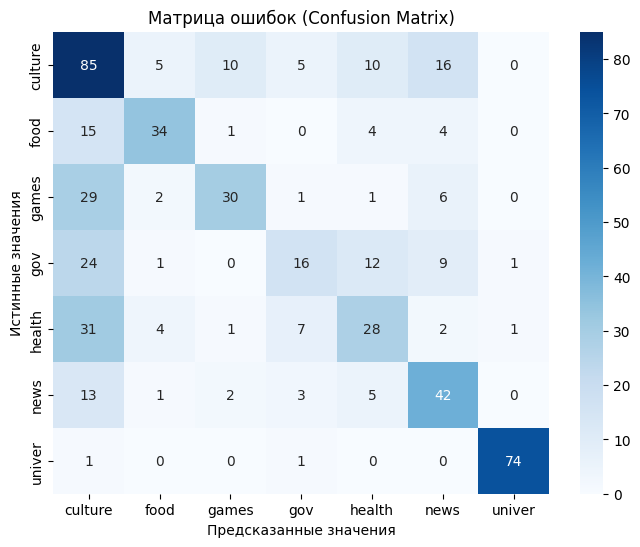

In [60]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.title('Матрица ошибок (Confusion Matrix)')
plt.show()

Можно видеть, что лучше всего модель предсказывает класс 'univer', а хуже всего 'gov'. Класс 'culture' является трудным. Модель не только часто ошибается в нём, но и присваивает элеменатам других классов этот класс.

* Здоровье (health) -> Культура (culture): 31 случай.
* Игры (games) -> Культура (culture): 29 случаев.
* Правительство (gov) -> Культура (culture): 24 случая.

### Classification Report

Выведем отчет с основными метриками: precision, recall, f1-score.

In [62]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

     culture       0.43      0.65      0.52       131
        food       0.72      0.59      0.65        58
       games       0.68      0.43      0.53        69
         gov       0.48      0.25      0.33        63
      health       0.47      0.38      0.42        74
        news       0.53      0.64      0.58        66
      univer       0.97      0.97      0.97        76

    accuracy                           0.58       537
   macro avg       0.61      0.56      0.57       537
weighted avg       0.59      0.58      0.57       537



In [74]:
print("Classification Report:")
print(classification_report(y_test, y_pred_entropy, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

     culture       0.42      0.63      0.51       131
        food       0.65      0.59      0.62        58
       games       0.69      0.39      0.50        69
         gov       0.47      0.25      0.33        63
      health       0.47      0.36      0.41        74
        news       0.54      0.67      0.59        66
      univer       0.97      0.97      0.97        76

    accuracy                           0.57       537
   macro avg       0.60      0.55      0.56       537
weighted avg       0.59      0.57      0.56       537



* precision (Точность)

Показывает, насколько можно доверять модели, когда она предсказывает этот класс.

* recall (Полнота)

Показывает, как хорошо модель находит все объекты этого класса.

* f1-score (F1-мера)

Это гармоническое среднее между precision и recall. Это единая метрика, которая пытается сбалансировать точность и полноту.

* support

Количество реальных объектов каждого класса в тестовой выборке.

* accuracy (Общая точность)

(Всего угадано правильно) / (Всего объектов)

* macro avg (Макро-усреднение)

Простое среднее арифметическое метрик по всем классам. (Precision_культуры + Precision_еды + ... + Precision_универа) / 7

* weighted avg (Взвешенное усреднение)

Каждый класс вносит вклад в среднее значение пропорционально своему размеру (support)

### ROC-кривая и AUC

Для построения ROC-кривой нам нужны вероятности принадлежности к классу, а не сами классы.

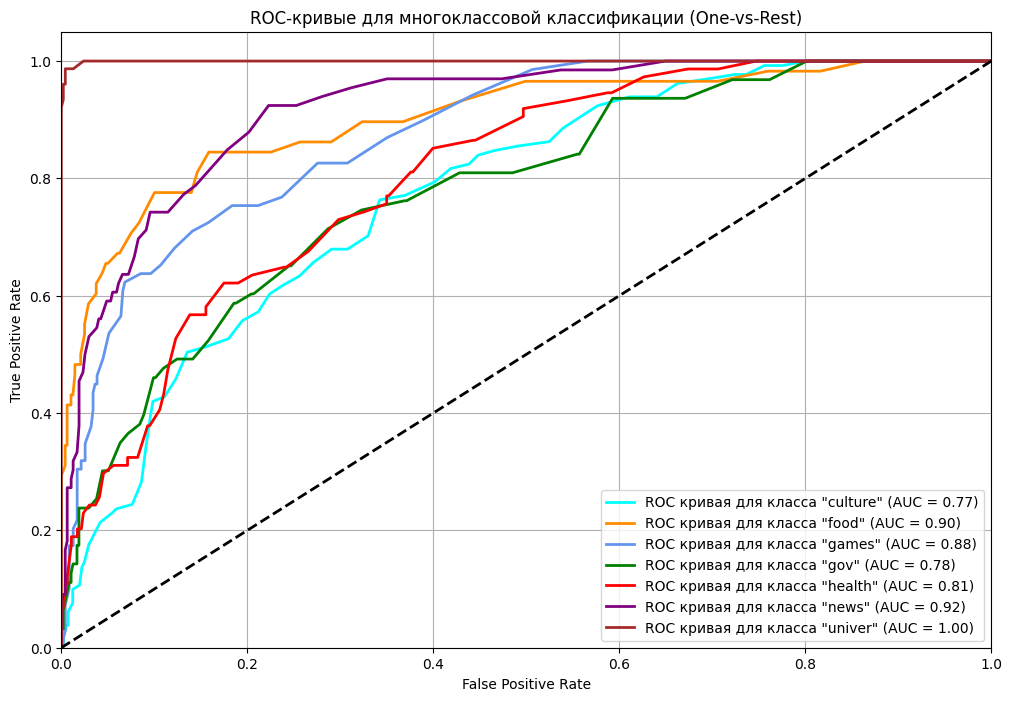

In [66]:
# --- Подготовка данных для многоклассовой ROC ---

# 1. Получаем предсказанные вероятности для ВСЕХ классов
y_pred_proba = clf_gini.predict_proba(X_test)

# 2. Бинаризуем истинные метки y_test. 
# Это превращает метки [0, 1, 2, ...] в матрицу [[1,0,0], [0,1,0], [0,0,1], ...]
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
n_classes = y_test_binarized.shape[1] # Получаем количество классов

# 3. Получаем названия классов, как и раньше
class_names = sorted(y_train.unique())

# --- Вычисление ROC-кривых и AUC для каждого класса ---

# Словари для хранения fpr, tpr и roc_auc для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Построение графика ---

plt.figure(figsize=(12, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown'])

for i, color, class_name in zip(range(n_classes), colors, class_names):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC кривая для класса "{class_name}" (AUC = {roc_auc[i]:0.2f})')

# Добавляем диагональную линию (случайное угадывание)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для многоклассовой классификации (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

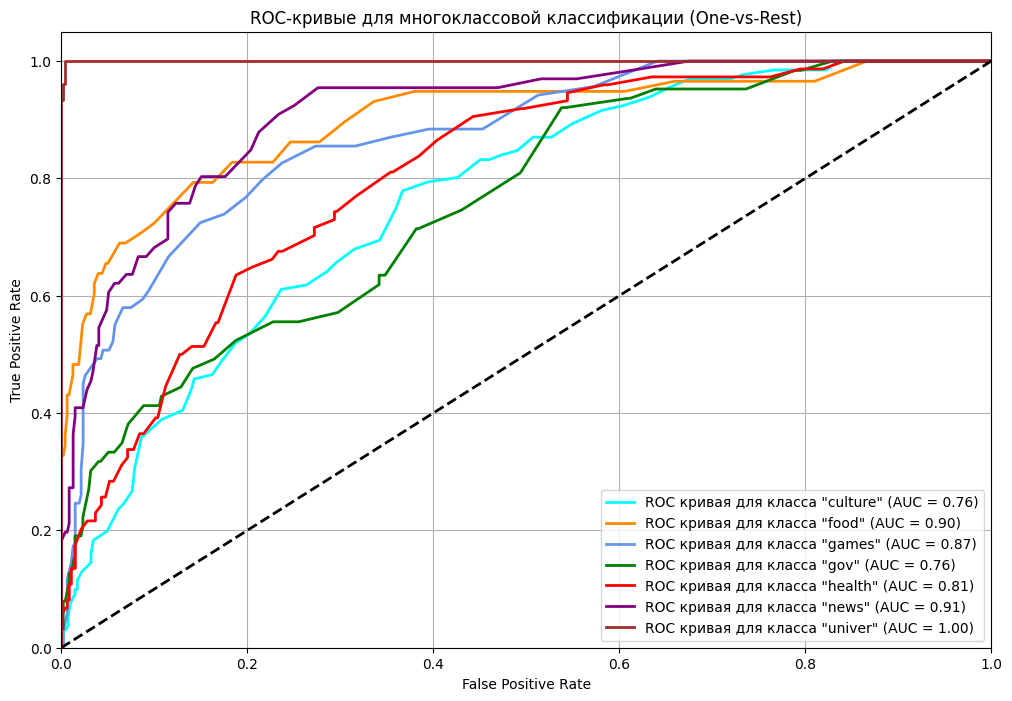

In [75]:
# --- Подготовка данных для многоклассовой ROC ---

# 1. Получаем предсказанные вероятности для ВСЕХ классов
y_pred_entropy_proba = clf_entropy.predict_proba(X_test)

# 2. Бинаризуем истинные метки y_test. 
# Это превращает метки [0, 1, 2, ...] в матрицу [[1,0,0], [0,1,0], [0,0,1], ...]
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
n_classes = y_test_binarized.shape[1] # Получаем количество классов

# 3. Получаем названия классов, как и раньше
class_names = sorted(y_train.unique())

# --- Вычисление ROC-кривых и AUC для каждого класса ---

# Словари для хранения fpr, tpr и roc_auc для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_entropy_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Построение графика ---

plt.figure(figsize=(12, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown'])

for i, color, class_name in zip(range(n_classes), colors, class_names):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC кривая для класса "{class_name}" (AUC = {roc_auc[i]:0.2f})')

# Добавляем диагональную линию (случайное угадывание)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для многоклассовой классификации (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Общая точность классификации

In [68]:
# Предсказания для модели со 100 деревьями (clf_gini) у нас уже есть в переменной y_pred
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.5754


In [76]:
# Предсказания для модели со 100 деревьями (clf_gini) у нас уже есть в переменной y_pred
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with 100 decision-trees : 0.5680


### Набор данных с ожидаемыми и прогнозными значениями

In [69]:
# Важно убедиться, что индексы совпадают. y_test и y_pred - это numpy-массивы.
# Преобразуем их в pd.Series с индексами от y_test, чтобы избежать проблем.
results_df = pd.DataFrame({
    'Ожидаемое значение': y_test.values,
    'Прогнозное значение': y_pred
}, index=y_test.index)

In [70]:
# Абсолютная ошибка для классификации - это просто разница, которая равна 0, если угадали, и 1, если нет.
results_df['Абсолютная ошибка'] = (results_df['Ожидаемое значение'] != results_df['Прогнозное значение']).astype(int)

print("Набор данных с результатами:")
print(results_df.head(10))

Набор данных с результатами:
     Ожидаемое значение Прогнозное значение  Абсолютная ошибка
1056               food                food                  0
1922             health              health                  0
1734                gov             culture                  1
3032             univer              univer                  0
248             culture                news                  1
201             culture             culture                  0
1903             health              health                  0
498             culture             culture                  0
2912             univer              univer                  0
2772             univer              univer                  0


# Стекинг (Stacking)

Обнаружено классов: 7


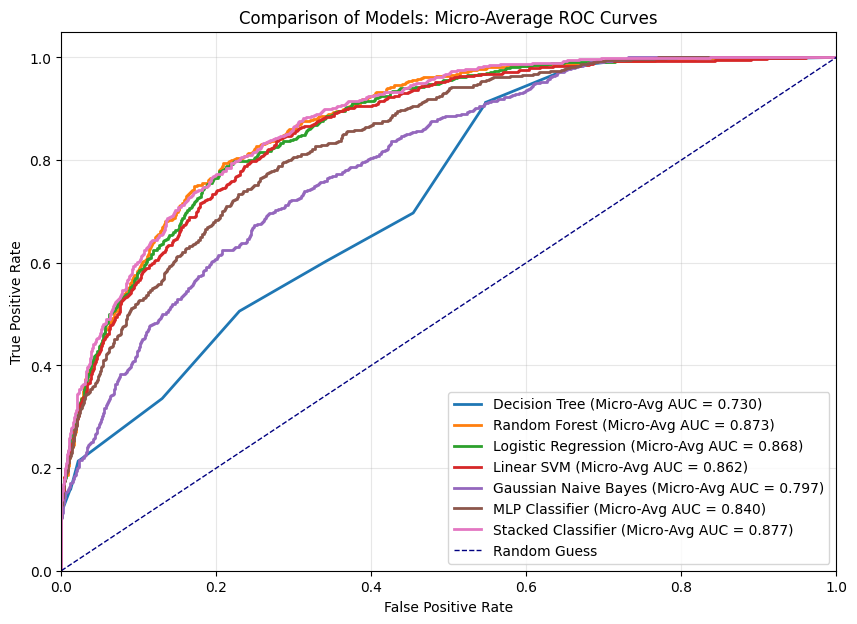

In [16]:
# Формирование матрицы признаков и вектора целевой переменной
X_raw = df.drop(['domain', 'filename'], axis=1)
y_raw = df['domain']

# Разделение выборки на обучающую и тестовую
# test_size=0.2: 20% данных откладывается для валидации
# random_state=42: фиксация генератора псевдослучайных чисел для воспроизводимости разбиения
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

# Проверка количества классов
class_names = sorted(y_train.unique())
n_classes = len(class_names)
print(f"Обнаружено классов: {n_classes}")

# Стандартизация признаков (Z-score normalization)
# Необходима для алгоритмов, чувствительных к масштабу (SVM, MLP, Logistic Regression)
scaler = StandardScaler()

# Вычисляем среднее и отклонение на train и применяем преобразование
X_train_transformed = scaler.fit_transform(X_train)
# Применяем параметры, вычисленные на train, к test (чтобы избежать утечки данных)
X_test_transformed = scaler.transform(X_test)


# -------------------------------------------------------------------------
# 2. ИНИЦИАЛИЗАЦИЯ И ОБУЧЕНИЕ МОДЕЛЕЙ (MODEL TRAINING)
# -------------------------------------------------------------------------

# Определение конфигурации классификаторов
tree = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_split=10,
                            min_samples_leaf=5, random_state=111, class_weight="balanced")

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=111, class_weight="balanced")

logistic = LogisticRegression(penalty=None, C=1.0, fit_intercept=True, 
                            class_weight='balanced', l1_ratio=None,  max_iter=3000)

lsvm = LinearSVC(penalty='l1', loss='squared_hinge', C=0.5, multi_class='ovr',
                fit_intercept=True, class_weight='balanced', dual=False, random_state=111, max_iter=1000000)

nb = GaussianNB(priors=None)

ann = MLPClassifier(hidden_layer_sizes=(20, 10), activation='tanh', solver='adam', alpha=0, batch_size=20,
                    learning_rate='constant', learning_rate_init=0.01, max_iter=100000, random_state=111, n_iter_no_change=20)

# Независимое обучение базовых моделей на стандартизированных данных
tree.fit(X_train_transformed, y_train)
rf.fit(X_train_transformed, y_train)
logistic.fit(X_train_transformed, y_train)
lsvm.fit(X_train_transformed, y_train)
nb.fit(X_train_transformed, y_train)
ann.fit(X_train_transformed, y_train)

meta_learner = LogisticRegression(class_weight='balanced', max_iter=3000)

# Создание и обучение стекинг-классификатора
# Мета-модель (final_estimator) обучается на прогнозах базовых моделей + исходных признаках (passthrough=True)
stack_clf = StackingClassifier(estimators=[("tree", tree), ("rf", rf), ("logistic", logistic),
                                        ("lsvm", lsvm), ("nb", nb)],
                            final_estimator=meta_learner, cv=5, stack_method='auto', n_jobs=-1, passthrough=False, verbose=0)

stack_clf.fit(X_train_transformed, y_train)


# -------------------------------------------------------------------------
# 3. ОЦЕНКА И ВИЗУАЛИЗАЦИЯ (EVALUATION & ROC CURVES)
# -------------------------------------------------------------------------

# Словарь обученных классификаторов для итеративного анализа
classifiers = {
    "Decision Tree": tree,
    "Random Forest": rf,
    "Logistic Regression": logistic,
    "Linear SVM": lsvm,
    "Gaussian Naive Bayes": nb,
    "MLP Classifier": ann,
    "Stacked Classifier": stack_clf
}

# Бинаризация меток классов для расчета ROC
# Превращает y_test (например, ['A', 'B', 'A']) в матрицу [[1,0], [0,1], [1,0]]
lb = LabelBinarizer()
lb.fit(y_train)
y_test_bin = lb.transform(y_test)

# Инициализация контейнеров для метрик
fpr = {}
tpr = {}
roc_auc = {}

# Расчет метрик ROC
for name, clf in classifiers.items():
    try:
        # 1. Получение матрицы оценок (Scores)
        if name == "Linear SVM":
            y_score = clf.decision_function(X_test_transformed)
        else:
            y_score = clf.predict_proba(X_test_transformed)

        # 2. Расчет ROC (Micro-averaging)
        # Используется универсальный метод .ravel()
        # Он вытягивает матрицы (N, 7) в длинные векторы (N*7, ),
        # что позволяет построить одну общую кривую для всех классов сразу.
        
        y_test_flat = y_test_bin.ravel()
        y_score_flat = y_score.ravel()

        fpr[name], tpr[name], _ = roc_curve(y_test_flat, y_score_flat)
        roc_auc[name] = roc_auc_score(y_test_flat, y_score_flat)
        
    except Exception as e:
        print(f"Ошибка при расчете модели {name}: {e}")

# -------------------------------------------------------------------------
# 4. ВИЗУАЛИЗАЦИЯ
# -------------------------------------------------------------------------

plt.figure(figsize=(10, 7))

for name in classifiers:
    if name in roc_auc:
        plt.plot(fpr[name], tpr[name], lw=2, label=f'{name} (Micro-Avg AUC = {roc_auc[name]:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of Models: Micro-Average ROC Curves')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

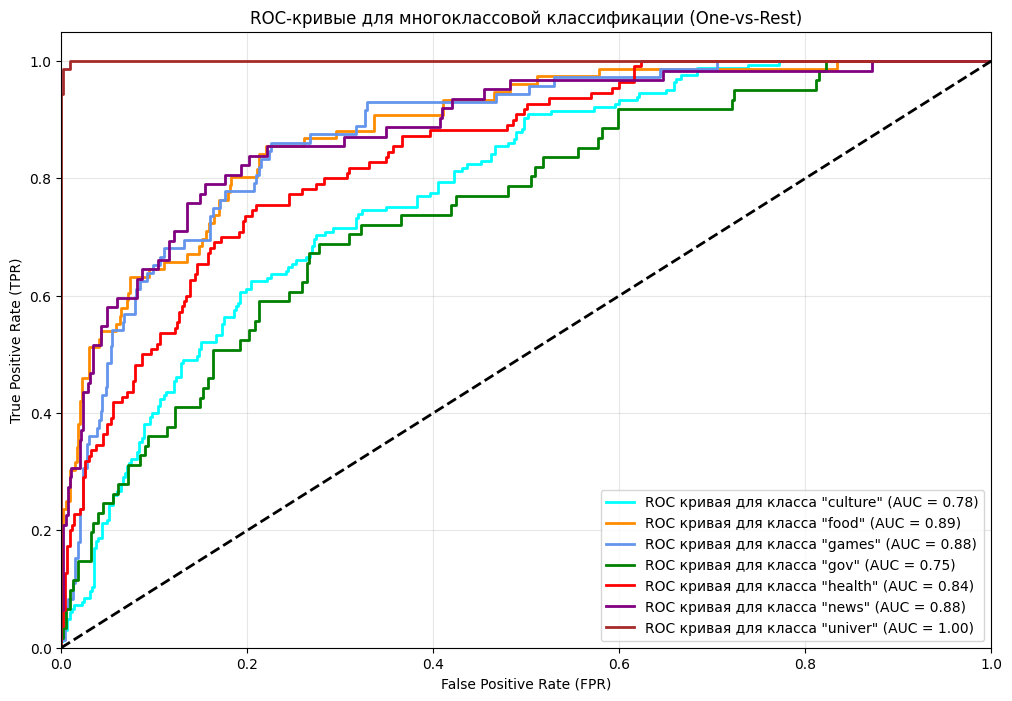

In [22]:
# -------------------------------------------------------------------------
# ПОСТРОЕНИЕ МНОГОКЛАССОВОГО ROC (One-vs-Rest)
# -------------------------------------------------------------------------

# 1. Получаем предсказанные вероятности для ВСЕХ классов
# ВАЖНО: Используем X_test_transformed, так как модель обучалась на скалированных данных
y_pred_proba = stack_clf.predict_proba(X_test_transformed)

# 2. Бинаризуем истинные метки y_test.
# Превращает метки классов в бинарную матрицу (One-Hot Encoding)
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Получаем количество классов
n_classes = y_test_binarized.shape[1]

# 3. Получаем названия классов
# Берем их напрямую из модели, чтобы порядок совпадал с колонками вероятностей
class_names = stack_clf.classes_

# --- Вычисление ROC-кривых и AUC для каждого класса ---

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # Считаем ROC для i-го класса против всех остальных
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Построение графика ---

plt.figure(figsize=(12, 8))
# Создаем цикличный итератор цветов (если классов больше, чем цветов в списке, они начнут повторяться)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC кривая для класса "{class_names[i]}" (AUC = {roc_auc[i]:0.2f})')

# Добавляем диагональную линию (случайное угадывание)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривые для многоклассовой классификации (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

In [23]:
evaluate(stack_clf, X_train_transformed, X_test_transformed, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[233  68 101  47  81  51   0]
 [ 11 244   5   3  24   6   0]
 [ 21   5 231  12  10  11   0]
 [ 27   5   3 211  14  25   0]
 [ 49  15   8  38 300  21   0]
 [  9   3   3  12   5 234   0]
 [  0   0   0   1   0   0 320]]
ACCURACY SCORE:
0.7187
CLASSIFICATION REPORT:
              culture        food       games         gov      health  \
precision    0.665714    0.717647    0.658120    0.651235    0.691244   
recall       0.401033    0.832765    0.796552    0.740351    0.696056   
f1-score     0.500537    0.770932    0.720749    0.692939    0.693642   
support    581.000000  293.000000  290.000000  285.000000  431.000000   

                 news      univer  accuracy    macro avg  weighted avg  
precision    0.672414    1.000000  0.718687     0.722339      0.717996  
recall       0.879699    0.996885  0.718687     0.763334      0.718687  
f1-score     0.762215    0.998440  0.718687     0.734208      0.707502  
support    266.000000  321.000000  0.71868

Обнаружено классов: 7


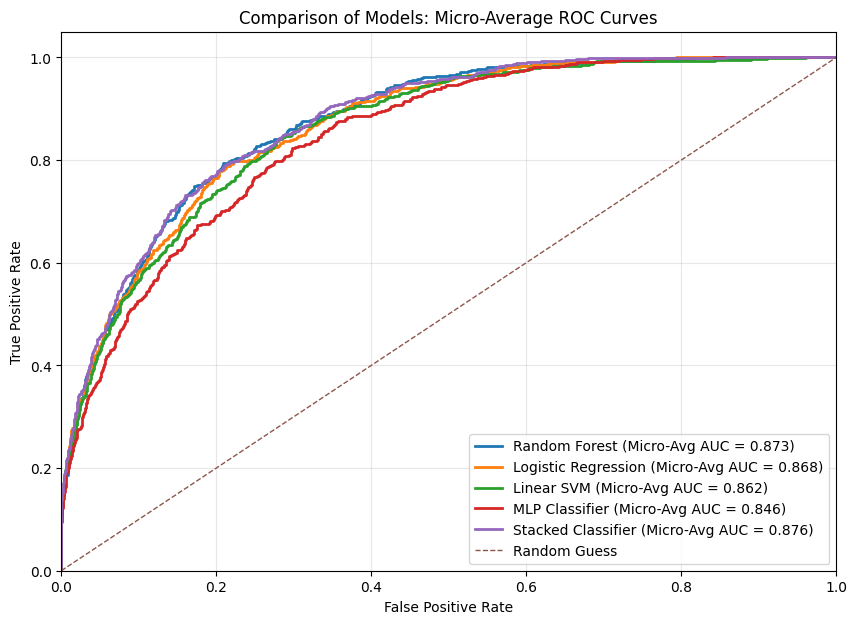

In [12]:
# Формирование матрицы признаков и вектора целевой переменной
X_raw = df.drop(['domain', 'filename'], axis=1)
y_raw = df['domain']

# Разделение выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42
)

# Проверка количества классов
class_names = sorted(y_train.unique())
n_classes = len(class_names)
print(f"Обнаружено классов: {n_classes}")

# Стандартизация признаков
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

# -------------------------------------------------------------------------
# 2. ИНИЦИАЛИЗАЦИЯ И ОБУЧЕНИЕ МОДЕЛЕЙ
# -------------------------------------------------------------------------

# Удалено из стекинга: DecisionTree и GaussianNB

rf = RandomForestClassifier(
    n_estimators=100, max_depth=10, random_state=111, class_weight="balanced"
)

logistic = LogisticRegression(
    penalty=None, C=1.0, fit_intercept=True,
    class_weight='balanced', max_iter=3000
)

lsvm = LinearSVC(
    penalty='l1', loss='squared_hinge', C=0.5,
    multi_class='ovr', fit_intercept=True,
    class_weight='balanced', dual=False,
    random_state=111, max_iter=1000000
)

# Усиленная нейросеть — около 300 нейронов
ann = MLPClassifier(
    hidden_layer_sizes=(128, 32),
    activation='tanh', solver='adam',
    alpha=0, batch_size=20,
    learning_rate='constant',
    learning_rate_init=0.01,
    max_iter=100000,
    random_state=111,
    n_iter_no_change=20
)

# Обучение базовых моделей
rf.fit(X_train_transformed, y_train)
logistic.fit(X_train_transformed, y_train)
lsvm.fit(X_train_transformed, y_train)
ann.fit(X_train_transformed, y_train)

meta_learner = LogisticRegression(
    class_weight='balanced', max_iter=3000
)

# --- ОБНОВЛЕННЫЙ СТЕКИНГ (без tree и nb!) ---
stack_clf = StackingClassifier(
    estimators=[
        ("rf", rf),
        ("logistic", logistic),
        ("lsvm", lsvm),
        ("ann", ann)
    ],
    final_estimator=meta_learner,
    cv=5,
    stack_method='auto',
    n_jobs=-1,
    passthrough=False
)

stack_clf.fit(X_train_transformed, y_train)

# -------------------------------------------------------------------------
# 3. ОЦЕНКА И ROC
# -------------------------------------------------------------------------

classifiers = {
    "Random Forest": rf,
    "Logistic Regression": logistic,
    "Linear SVM": lsvm,
    "MLP Classifier": ann,
    "Stacked Classifier": stack_clf
}

# Бинаризация целевых меток
lb = LabelBinarizer()
lb.fit(y_train)
y_test_bin = lb.transform(y_test)

fpr = {}
tpr = {}
roc_auc = {}

for name, clf in classifiers.items():
    try:
        if name == "Linear SVM":
            y_score = clf.decision_function(X_test_transformed)
        else:
            y_score = clf.predict_proba(X_test_transformed)

        y_test_flat = y_test_bin.ravel()
        y_score_flat = y_score.ravel()

        fpr[name], tpr[name], _ = roc_curve(y_test_flat, y_score_flat)
        roc_auc[name] = roc_auc_score(y_test_flat, y_score_flat)
        
    except Exception as e:
        print(f"Ошибка при расчете модели {name}: {e}")

# -------------------------------------------------------------------------
# 4. ВИЗУАЛИЗАЦИЯ ROC
# -------------------------------------------------------------------------

plt.figure(figsize=(10, 7))

for name in classifiers:
    if name in roc_auc:
        plt.plot(fpr[name], tpr[name], lw=2,
                label=f'{name} (Micro-Avg AUC = {roc_auc[name]:.3f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of Models: Micro-Average ROC Curves')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()


In [13]:
evaluate(stack_clf, X_train_transformed, X_test_transformed, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[278  45  88  41  68  61   0]
 [  8 256   5   2  17   5   0]
 [ 18   1 251   4   6  10   0]
 [ 29   8   4 212  11  21   0]
 [ 27  14   4  28 343  15   0]
 [  5   2   3  12   4 240   0]
 [  0   0   0   0   0   0 321]]
ACCURACY SCORE:
0.7706
CLASSIFICATION REPORT:
              culture        food       games         gov      health  \
precision    0.761644    0.785276    0.707042    0.709030    0.763920   
recall       0.478485    0.873720    0.865517    0.743860    0.795824   
f1-score     0.587738    0.827141    0.778295    0.726027    0.779545   
support    581.000000  293.000000  290.000000  285.000000  431.000000   

                 news  univer  accuracy    macro avg  weighted avg  
precision    0.681818     1.0  0.770572     0.772676      0.774759  
recall       0.902256     1.0  0.770572     0.808523      0.770572  
f1-score     0.776699     1.0  0.770572     0.782206      0.762074  
support    266.000000   321.0  0.770572  2467.000000   246

In [24]:
scores = {}

## Bagging Classifier (Бэггинг)

In [17]:
# Бэгинг на базе деревьев решений
base_clf = DecisionTreeClassifier()
# Создаем ансамбль из 10 деревьев
model = BaggingClassifier(estimator=base_clf, n_estimators=10)
model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_test_transformed)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5186385737439222


In [19]:
tree = DecisionTreeClassifier()
# Создаем ансамбль из 1500 деревьев
bagging_clf = BaggingClassifier(estimator=tree, n_estimators=150, random_state=42)
bagging_clf.fit(X_train_transformed, y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,150
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [20]:
evaluate(bagging_clf, X_train_transformed, X_test_transformed, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[581   0   0   0   0   0   0]
 [  0 293   0   0   0   0   0]
 [  0   0 290   0   0   0   0]
 [  0   0   0 285   0   0   0]
 [  0   0   0   0 431   0   0]
 [  0   0   0   0   0 266   0]
 [  0   0   0   0   0   0 321]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
           culture   food  games    gov  health   news  univer  accuracy  \
precision      1.0    1.0    1.0    1.0     1.0    1.0     1.0       1.0   
recall         1.0    1.0    1.0    1.0     1.0    1.0     1.0       1.0   
f1-score       1.0    1.0    1.0    1.0     1.0    1.0     1.0       1.0   
support      581.0  293.0  290.0  285.0   431.0  266.0   321.0       1.0   

           macro avg  weighted avg  
precision        1.0           1.0  
recall           1.0           1.0  
f1-score         1.0           1.0  
support       2467.0        2467.0  
TESTING RESULTS: 
CONFUSION MATRIX:
[[92  9 23  4 25 12  0]
 [15 36  3  4 17  1  0]
 [23  6 31  1  5  6  0]
 [21  3  3 11 14  8  1]
 [

In [25]:
scores = {
    'Bagging Classifier 150': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train_transformed)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test_transformed)),
    },
}

## ExtraTreesClassifier — Extremely Randomized Trees

In [22]:
ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train_transformed, y_train)
evaluate(ex_tree_clf, X_train_transformed, X_test_transformed, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[581   0   0   0   0   0   0]
 [  0 293   0   0   0   0   0]
 [  0   0 290   0   0   0   0]
 [  0   0   0 285   0   0   0]
 [  0   0   0   0 431   0   0]
 [  0   0   0   0   0 266   0]
 [  0   0   0   0   0   0 321]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
           culture   food  games    gov  health   news  univer  accuracy  \
precision      1.0    1.0    1.0    1.0     1.0    1.0     1.0       1.0   
recall         1.0    1.0    1.0    1.0     1.0    1.0     1.0       1.0   
f1-score       1.0    1.0    1.0    1.0     1.0    1.0     1.0       1.0   
support      581.0  293.0  290.0  285.0   431.0  266.0   321.0       1.0   

           macro avg  weighted avg  
precision        1.0           1.0  
recall           1.0           1.0  
f1-score         1.0           1.0  
support       2467.0        2467.0  
TESTING RESULTS: 
CONFUSION MATRIX:
[[99 10 18  5 22 11  0]
 [18 35  1  2 15  5  0]
 [28  4 30  1  3  6  0]
 [19  2  2 10 18  9  1]
 [

In [26]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train_transformed)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test_transformed)),
    }

## AdaBoost (Адаптивный Бустинг)

In [36]:
ada_boost_clf = AdaBoostClassifier(n_estimators=300)
ada_boost_clf.fit(X_train_transformed, y_train)
evaluate(ada_boost_clf, X_train_transformed, X_test_transformed, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[293  47  77  38  85  38   3]
 [ 66 162  14  11  23  15   2]
 [ 79  11 156   8  18  15   3]
 [ 76  11   9  79  88  21   1]
 [ 96  27  12  60 220  13   3]
 [ 59  10   7  11  14 163   2]
 [  8   1   0   1   0   0 311]]
ACCURACY SCORE:
0.5610
CLASSIFICATION REPORT:
              culture        food       games         gov      health  \
precision    0.432792    0.602230    0.567273    0.379808    0.491071   
recall       0.504303    0.552901    0.537931    0.277193    0.510441   
f1-score     0.465819    0.576512    0.552212    0.320487    0.500569   
support    581.000000  293.000000  290.000000  285.000000  431.000000   

                 news      univer  accuracy    macro avg  weighted avg  
precision    0.615094    0.956923  0.561005     0.577884      0.560640  
recall       0.612782    0.968847  0.561005     0.566343      0.561005  
f1-score     0.613936    0.962848  0.561005     0.570341      0.559046  
support    266.000000  321.000000  0.56100

In [37]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train_transformed)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test_transformed)),
    }

## Stochastic Gradient Boosting

In [21]:
grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train_transformed, y_train)
evaluate(grad_boost_clf, X_train_transformed, X_test_transformed, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[512  11   3  11  29  15   0]
 [ 16 263   0   2   8   4   0]
 [ 22   0 244   3  10  11   0]
 [ 38   2   2 207  28   8   0]
 [ 27   5   1   5 384   9   0]
 [ 12   1   3   1   5 244   0]
 [  0   0   0   0   0   0 321]]
ACCURACY SCORE:
0.8816
CLASSIFICATION REPORT:
              culture        food       games         gov      health  \
precision    0.816587    0.932624    0.964427    0.903930    0.827586   
recall       0.881239    0.897611    0.841379    0.726316    0.890951   
f1-score     0.847682    0.914783    0.898711    0.805447    0.858101   
support    581.000000  293.000000  290.000000  285.000000  431.000000   

                 news  univer  accuracy    macro avg  weighted avg  
precision    0.838488     1.0  0.881638     0.897663      0.885986  
recall       0.917293     1.0  0.881638     0.879256      0.881638  
f1-score     0.876122     1.0  0.881638     0.885835      0.881477  
support    266.000000   321.0  0.881638  2467.000000   246

In [28]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train_transformed)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test_transformed)),
    }

<Axes: >

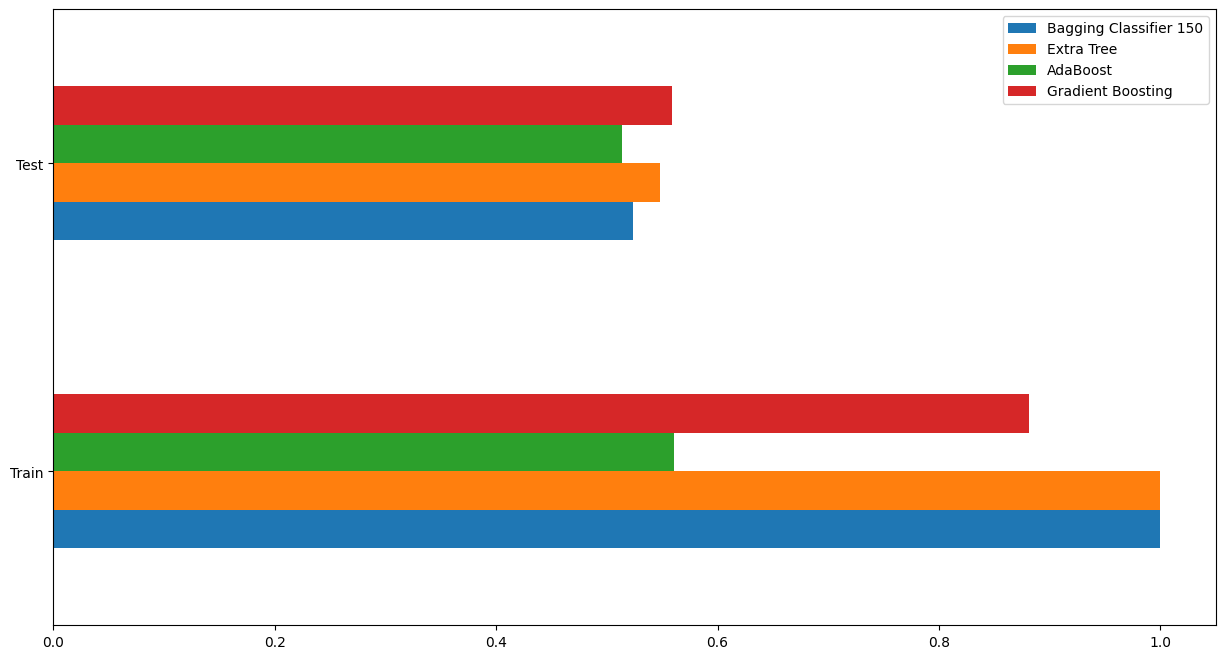

In [38]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

In [39]:
scores_df

,Bagging Classifier 150,Extra Tree,AdaBoost,Gradient Boosting
Train,1.000000,1.000000,0.561005,0.881638
Test,0.523501,0.547812,0.513776,0.559157
